### Crypto Challenge - Correlations

#### Correlations b/w various crypto instruments (Binance)
* Retrieve historic data from Binance using their API
* Historic = most recent 30 days
* Data = daily price data of various perpetual swap instruments
* Instruments = perpetual swaps / on Binance USD-Margined derivatives exchange ("USDS-M"):
    * BTC/USDT
    * ETH/USDT
    * XRP/USDT
    * ADA/USDT
    * SOL/USDT
* Refer below for more instructions

#### Info on USDS-M contracts:
* Settlement in USD-pegged assets: contracts are denominated and settled in USDT or BUSD.
* Expiration: Perpetual and Quarterly.
* Clear pricing rules: each futures contract specifies the base asset's quantity delivered for a single contract, also known as "Contract Unit". For instance, BTC/USDT, ETH/USDT, and BCH/USDT futures contracts represent only one unit of its respective base asset, similar to spot markets.
* (Source: https://www.binance.com/en/support/faq/85eac2bba0b342819122dc9bd4745e9b)

* USDS-M Futures Contract Specifications: (https://www.binance.com/en/support/faq/360033161972)

* Advantages of USDS-M contracts:

* USDⓈ-Margined contracts are linear futures quoted and settled in USDT or BUSD. One of the key benefits of USDT or BUSD settlement is that you can easily calculate your returns in fiat. This makes USDⓈ-Margined contracts more intuitive. For example, when you make 500 BUSD in profit, you can easily estimate that the profit is worth approximately $500 - since the value of 1 BUSD is pegged closely to 1 USD.
Additionally, a universal settlement currency, such as BUSD or USDT, provides more flexibility. You can use the same settlement currency across various futures contracts (i.e., BTC, ETH, XRP, etc.). This eliminates the need to buy the underlying coins to fund futures positions. As such, you will not incur excessive fees as there is no additional conversion required when trading with USDT.
In periods of high volatility, USDⓈ-Margined contracts can help reduce the risk of large price swings. Thus, you do not need to worry about hedging their underlying collateral exposure.

* Price Index of USDS-M Contracts:
* The underlying contract for the Perpetual Contract is the ‘true’ value of the Contract, and an average of the prices on the major markets constitutes the “Price Index” which is the primary component of Mark Price.
The Price Index is a bucket of prices from the major Spot Market Exchanges. The Price Index for USDⓈ-M futures contracts derives prices from Huobi, Okex, Bittrex, HitBTC, Gate.io, Bitmax, Poloniex, FTX, MXC. (Source: https://www.binance.com/en/support/faq/547ba48141474ab3bddc5d7898f97928)

#### Code Documentation
* Binance API docs: (https://binance-docs.github.io/)
* Python-Binance library docs: (https://python-binance.readthedocs.io/)

#### Troubleshooting
* Dev forums: (https://dev.binance.vision)
* 

##### Commenced python-binance SDK library, due to time contraints, continued to interact directly with Binance APIs.

In [1]:
# Install/import dependencies

import json
import requests
# from api_keys import exchange_api_key1, exchange_api_key2
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
from scipy.stats import linregress
import datetime
# python-binance package install


In [2]:
# Import initialise exchange api keys
from api_keys import exchange_api_key1, exchange_api_key2

In [3]:
# Install crypto/finance specific dependencies
# ! pip install python-binance

In [4]:
# Import crypto/finance dependencies
# from binance import Client

In [5]:
# Authenticate exchange API keys to python client (using Binance-Python)
# Setup client
# client = Client(exchange_api_key1, exchange_api_key2)

In [6]:
# tickers = client.get_all_tickers()
# tickers

In [7]:
# Checking rate limits
# client.get_exchange_info()


In [8]:
# price_data = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1DAY,'13 Sep 2022')
# price_data

In [9]:
# client.get_historical_klines_generator??

# client.get_continuousklines??

# client.futures_continous_klines('BTCUSDT')
#https://fapi.binance.com/fapi/v1/continuousKlines?pair=BTCUSDT&contractType=PERPETUAL

In [10]:
# base_url = 

In [11]:
# btcfutures = client.get_historical_klines(symbol='BTCUSDT',
#                                           type= 'USD_M_Futures',
#                                           interval=Client.KLINE_INTERVAL_1DAY,
#                                           start_str= '',)

In [12]:
# client.get_continuous_kline()

### Perform API Calls
* Binance API docs:
https://binance-docs.github.io/apidocs/futures/en/#continuous-contract-kline-candlestick-data
* Response:

* 1607444700000,          // Open time
* "18879.99",             // Open
* "18900.00",             // High
* "18878.98",             // Low
* "18896.13",             // Close (or latest price)
* "492.363",              // Volume
* 1607444759999,          // Close time
* "9302145.66080",        // Quote asset volume
* 1874,                   // Number of trades
* "385.983",              // Taker buy volume
* "7292402.33267",        // Taker buy quote asset volume
* "0"                     // Ignore

In [13]:

#FAPI docs Binance USDS-M Futures
# Link: (https://binance-docs.github.io/apidocs/futures/en/#continuous-contract-kline-candlestick-data)

# Base binance url for calling API
base_url = "https://fapi.binance.com"          # end point for USDS-M
event = "/fapi/v1/continuousKlines"            # Continuous contract Kline
pair_btcusdt = "BTCUSDT"                       # string, mandatory
contractType = 'PERPETUAL'                     # enum, mandatory
interval = '2h'                                # enum, mandatory
limit = 360 + 1                                # 30days x 2hrly + 1 extra for droping due to pct calc NaN

# # Params for additional data
pair_ethusdt = "ETHUSDT"
pair_xrpusdt = "XRPUSDT"
pair_adausdt = "ADAUSDT"
pair_solusdt = "SOLUSDT"


# Build various query URLs
query_url_btcusdt = f"{base_url}{event}?pair={pair_btcusdt}&contractType={contractType}&interval={interval}&limit={limit}"
query_url_ethusdt = f"{base_url}{event}?pair={pair_ethusdt}&contractType={contractType}&interval={interval}&limit={limit}"
query_url_xrpusdt = f"{base_url}{event}?pair={pair_xrpusdt}&contractType={contractType}&interval={interval}&limit={limit}"
query_url_adausdt = f"{base_url}{event}?pair={pair_adausdt}&contractType={contractType}&interval={interval}&limit={limit}"
query_url_solusdt = f"{base_url}{event}?pair={pair_solusdt}&contractType={contractType}&interval={interval}&limit={limit}"

# Timestamp execution (UTC)
executed_utc = str(pd.Timestamp.utcnow())

query_url_ethusdt


'https://fapi.binance.com/fapi/v1/continuousKlines?pair=ETHUSDT&contractType=PERPETUAL&interval=2h&limit=361'

In [14]:
# Loop query_url customising for each pair. 
# This code would be required to scale exercise.

# for pair in pairs:
#     try:
#         # Retrieve "continuousKlines" for perps
#         query_url = f"{base_url}{event}?pair={pair}&contractType={contractType}&interval={interval}"
#         response = requests.get(query_url).json()
#         f'{pair}_raw_df' = pd.DataFrame(response)

In [15]:
response_btcusdt = requests.get(query_url_btcusdt).json()
response_ethusdt = requests.get(query_url_ethusdt).json()
response_xrpusdt = requests.get(query_url_xrpusdt).json()
response_adausdt = requests.get(query_url_adausdt).json()
response_solusdt = requests.get(query_url_solusdt).json()
# response_solusdt

In [16]:
## Convert retrieved json > Pandas dataframe

btcusdt_raw_df = pd.DataFrame(response_btcusdt)
ethusdt_raw_df = pd.DataFrame(response_ethusdt)
xrpusdt_raw_df = pd.DataFrame(response_xrpusdt)
adausdt_raw_df = pd.DataFrame(response_adausdt)
solusdt_raw_df = pd.DataFrame(response_solusdt)
# btcusdt_raw_df


In [17]:
## Save image of raw data df

# solusdt_raw_df

raw_data = solusdt_raw_df.head()

# Saving image of raw_data
import dataframe_image as dfi

dfi.export(raw_data, "Images/Eg_raw_data.png")

In [18]:
## Rename columns of df, based on response dictionary,

# from (https://binance-docs.github.io/apidocs/futures/en/#continuous-contract-kline-candlestick-data):
#     1607444700000,          // Open time
#     "18879.99",             // Open
#     "18900.00",             // High
#     "18878.98",             // Low
#     "18896.13",             // Close (or latest price)
#     "492.363",              // Volume
#     1607444759999,          // Close time
#     "9302145.66080",        // Quote asset volume
#     1874,                   // Number of trades
#     "385.983",              // Taker buy volume
#     "7292402.33267",        // Taker buy quote asset volume
#     "0"                     // Ignore.

btcusdt_raw_df.columns = ["Open_time", "Open_BTC", "High_BTC", "Low_BTC", "Close_BTC",
                          "Volume", "Close_time_BTC", "Quote_asset_volume", "Number_of_trades",
                          "Taker_buy_volume", "Taker_buy_quote_asset_volume", "Ignore"]
ethusdt_raw_df.columns = ["Open_time", "Open_ETH", "High_ETH", "Low_BTC", "Close_ETH",
                          "Volume", "Close_time_ETH", "Quote_asset_volume", "Number_of_trades",
                          "Taker_buy_volume", "Taker_buy_quote_asset_volume", "Ignore"]
xrpusdt_raw_df.columns = ["Open_time", "Open_XRP", "High_XRP", "Low_XRP", "Close_XRP",
                          "Volume", "Close_time_XRP", "Quote_asset_volume", "Number_of_trades",
                          "Taker_buy_volume", "Taker_buy_quote_asset_volume", "Ignore"]
adausdt_raw_df.columns = ["Open_time", "Open_ADA", "High_ADA", "Low_ADA", "Close_ADA",
                          "Volume", "Close_time_ADA", "Quote_asset_volume", "Number_of_trades",
                          "Taker_buy_volume", "Taker_buy_quote_asset_volume", "Ignore"]
solusdt_raw_df.columns = ["Open_time", "Open_SOL", "High_SOL", "Low_SOL", "Close_SOL",
                          "Volume", "Close_time_SOL", "Quote_asset_volume", "Number_of_trades",
                          "Taker_buy_volume", "Taker_buy_quote_asset_volume", "Ignore"]

In [19]:
## Check len of response
# print(solusdt_raw_df.head())
btcusdt_raw_df.shape

# print(f'There are 500 data points per pair (proof: btcusdt_raw_df.shape). I have a limit of 500 responses.')
# print(f'30 days x 24 hrs = 720hrs. Rolling last 720hr required, 1.44hr intervals returns 500 data points.')
# print(f'Rounding up to intervals of 2hrs, for max datapoints that cover last 720 hrs (30days)')

(361, 12)

In [20]:
# Check data type of DFs
solusdt_raw_df.dtypes

Open_time                        int64
Open_SOL                        object
High_SOL                        object
Low_SOL                         object
Close_SOL                       object
Volume                          object
Close_time_SOL                   int64
Quote_asset_volume              object
Number_of_trades                 int64
Taker_buy_volume                object
Taker_buy_quote_asset_volume    object
Ignore                          object
dtype: object

In [21]:
# Convert Open/close times to datetime
btcusdt_raw_df["Open_time"] = pd.to_datetime(btcusdt_raw_df["Open_time"]/1000, unit='s')
btcusdt_raw_df["Close_time_BTC"] = pd.to_datetime(btcusdt_raw_df["Close_time_BTC"]/1000, unit='s')

ethusdt_raw_df["Open_time"] = pd.to_datetime(ethusdt_raw_df["Open_time"]/1000, unit='s')
ethusdt_raw_df["Close_time_ETH"] = pd.to_datetime(ethusdt_raw_df["Close_time_ETH"]/1000, unit='s')

xrpusdt_raw_df["Open_time"] = pd.to_datetime(xrpusdt_raw_df["Open_time"]/1000, unit='s')
xrpusdt_raw_df["Close_time_XRP"] = pd.to_datetime(xrpusdt_raw_df["Close_time_XRP"]/1000, unit='s')

adausdt_raw_df["Open_time"] = pd.to_datetime(adausdt_raw_df["Open_time"]/1000, unit='s')
adausdt_raw_df["Close_time_ADA"] = pd.to_datetime(adausdt_raw_df["Close_time_ADA"]/1000, unit='s')

solusdt_raw_df["Open_time"] = pd.to_datetime(solusdt_raw_df["Open_time"]/1000, unit='s')
solusdt_raw_df["Close_time_SOL"] = pd.to_datetime(solusdt_raw_df["Close_time_SOL"]/1000, unit='s')

In [22]:
# Check head and tail of DFs. 
# As API returns data in ascending (head = nth itme), (tail = more recent interval)
print(xrpusdt_raw_df.tail())
print(adausdt_raw_df.head())

              Open_time Open_XRP High_XRP Low_XRP Close_XRP       Volume  \
356 2022-09-21 00:00:00   0.4134   0.4153  0.4042    0.4065  393741254.3   
357 2022-09-21 02:00:00   0.4065   0.4112  0.4029    0.4042  216390935.5   
358 2022-09-21 04:00:00   0.4042   0.4129  0.4026    0.4053  346528062.6   
359 2022-09-21 06:00:00   0.4054   0.4073  0.3893    0.4021  627656134.2   
360 2022-09-21 08:00:00   0.4022   0.4073  0.3951    0.4062  326146329.0   

                   Close_time_XRP Quote_asset_volume  Number_of_trades  \
356 2022-09-21 01:59:59.999000064    161328796.18457            164149   
357 2022-09-21 03:59:59.999000064     88072089.46653             92953   
358 2022-09-21 05:59:59.999000064    141584775.26971            129527   
359 2022-09-21 07:59:59.999000064    248742780.86804            235209   
360 2022-09-21 09:59:59.999000064    130606239.60862            135554   

    Taker_buy_volume Taker_buy_quote_asset_volume Ignore  
356      197399100.2               8088

In [23]:
## Drop redundant columns

# btcusdt_df = btcusdt_raw_df[["Open_time_BTC","Open_BTC","High_BTC","Low_BTC","Close_BTC","Close_time_BTC"]]
# ethusdt_df = ethusdt_raw_df[["Open_time_ETH","Open_ETH","High_ETH","Low_ETH","Close_ETH","Close_time_ETH"]]
# xrpusdt_df = xrpusdt_raw_df[["Open_time_XRP","Open_XRP","High_XRP","Low_XRP","Close_XRP","Close_time_XRP"]]
# adausdt_df = adausdt_raw_df[["Open_time_ADA","Open_ADA","High_ADA","Low_ADA","Close_ADA","Close_time_ADA"]]
# solusdt_df = solusdt_raw_df[["Open_time_SOL","Open_SOL","High_SOL","Low_SOL","Close_SOL","Close_time_SOL"]]

btcusdt_df = btcusdt_raw_df[["Open_time","Open_BTC"]]
ethusdt_df = ethusdt_raw_df[["Open_time","Open_ETH"]]
xrpusdt_df = xrpusdt_raw_df[["Open_time","Open_XRP"]]
adausdt_df = adausdt_raw_df[["Open_time","Open_ADA"]]
solusdt_df = solusdt_raw_df[["Open_time","Open_SOL"]]

In [24]:
# Check new DFs
solusdt_df

,Open_time,Open_SOL
0,2022-08-22 08:00:00,34.8900
1,2022-08-22 10:00:00,34.4600
2,2022-08-22 12:00:00,34.6300
3,2022-08-22 14:00:00,34.3500
4,2022-08-22 16:00:00,34.7800
...,...,...
356,2022-09-21 00:00:00,31.4100
357,2022-09-21 02:00:00,31.6400
358,2022-09-21 04:00:00,31.8200
359,2022-09-21 06:00:00,31.6700


In [25]:
# Merge DFs into 1
# By merging on "Open_time", ensuring prices of all assets are matched on time.
# Allows for correct calculation of correlations
btc_eth_df = pd.merge(btcusdt_df, ethusdt_df, on="Open_time")
btc_eth_xrp_df = pd.merge(btc_eth_df, xrpusdt_df, on="Open_time")
btc_eth_xrp_ada_df = pd.merge(btc_eth_xrp_df, adausdt_df, on="Open_time")
btc_eth_xrp_ada_sol_df = pd.merge(btc_eth_xrp_ada_df, solusdt_df, on="Open_time")

btc_eth_xrp_ada_sol_df

,Open_time,Open_BTC,Open_ETH,Open_XRP,Open_ADA,Open_SOL
0,2022-08-22 08:00:00,21089.20,1556.23,0.3351,0.44550,34.8900
1,2022-08-22 10:00:00,21167.50,1563.10,0.3339,0.44390,34.4600
2,2022-08-22 12:00:00,21238.60,1567.19,0.3354,0.44770,34.6300
3,2022-08-22 14:00:00,21296.00,1565.69,0.3360,0.44820,34.3500
4,2022-08-22 16:00:00,21388.00,1588.76,0.3371,0.45330,34.7800
...,...,...,...,...,...,...
356,2022-09-21 00:00:00,18866.70,1322.09,0.4134,0.44190,31.4100
357,2022-09-21 02:00:00,18879.60,1328.45,0.4065,0.45910,31.6400
358,2022-09-21 04:00:00,19011.70,1336.46,0.4042,0.45510,31.8200
359,2022-09-21 06:00:00,18914.60,1330.68,0.4054,0.44990,31.6700


In [26]:
## Convert object columns to floats, in prep for calculations
# Specify columns to be converted to float/numberic
float_columns = ["Open_BTC","Open_ETH","Open_XRP","Open_ADA","Open_SOL"]

# .astype(float), didn't convert objects
# btc_eth_xrp_ada_sol_df[float_columns] = btc_eth_xrp_ada_sol_df[float_columns].astype(float)
btc_eth_xrp_ada_sol_df[float_columns] = btc_eth_xrp_ada_sol_df[float_columns].apply(pd.to_numeric, axis=1)

In [27]:
# Add percentage change, calc'd on open price. For each interval

btc_eth_xrp_ada_sol_df['pct_BTC'] = btc_eth_xrp_ada_sol_df['Open_BTC'].pct_change()
btc_eth_xrp_ada_sol_df['pct_ETH'] = btc_eth_xrp_ada_sol_df['Open_ETH'].pct_change()
btc_eth_xrp_ada_sol_df['pct_XRP'] = btc_eth_xrp_ada_sol_df['Open_XRP'].pct_change()
btc_eth_xrp_ada_sol_df['pct_ADA'] = btc_eth_xrp_ada_sol_df['Open_ADA'].pct_change()
btc_eth_xrp_ada_sol_df['pct_SOL'] = btc_eth_xrp_ada_sol_df['Open_SOL'].pct_change()

In [28]:
# Check calcs
# btc_eth_xrp_ada_sol_df

In [29]:
# Drop 1st data point, pct is NaN
BEXAS_df = btc_eth_xrp_ada_sol_df.dropna()
BEXAS_df

,Open_time,Open_BTC,Open_ETH,Open_XRP,Open_ADA,Open_SOL,pct_BTC,pct_ETH,pct_XRP,pct_ADA,pct_SOL
1,2022-08-22 10:00:00,21167.5,1563.10,0.3339,0.4439,34.46,0.003713,0.004415,-0.003581,-0.003591,-0.012324
2,2022-08-22 12:00:00,21238.6,1567.19,0.3354,0.4477,34.63,0.003359,0.002617,0.004492,0.008560,0.004933
3,2022-08-22 14:00:00,21296.0,1565.69,0.3360,0.4482,34.35,0.002703,-0.000957,0.001789,0.001117,-0.008085
4,2022-08-22 16:00:00,21388.0,1588.76,0.3371,0.4533,34.78,0.004320,0.014735,0.003274,0.011379,0.012518
5,2022-08-22 18:00:00,21221.5,1573.31,0.3356,0.4496,34.47,-0.007785,-0.009725,-0.004450,-0.008162,-0.008913
...,...,...,...,...,...,...,...,...,...,...,...
356,2022-09-21 00:00:00,18866.7,1322.09,0.4134,0.4419,31.41,-0.000185,0.003926,0.012739,0.005919,-0.003174
357,2022-09-21 02:00:00,18879.6,1328.45,0.4065,0.4591,31.64,0.000684,0.004811,-0.016691,0.038923,0.007323
358,2022-09-21 04:00:00,19011.7,1336.46,0.4042,0.4551,31.82,0.006997,0.006030,-0.005658,-0.008713,0.005689
359,2022-09-21 06:00:00,18914.6,1330.68,0.4054,0.4499,31.67,-0.005107,-0.004325,0.002969,-0.011426,-0.004714


In [30]:
## Check objects converted to numeric

# btc_eth_xrp_ada_sol_df.info()
# btc_eth_xrp_ada_sol_df.drypes
# btc_eth_xrp_ada_sol_df.describe()
BEXAS_df.describe(include='datetime64[ns]')

c:\Users\Steve\anaconda3\envs\bootcamp\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,Open_time
count,360
unique,360
top,2022-08-22 10:00:00
freq,1
first,2022-08-22 10:00:00
last,2022-09-21 08:00:00


In [31]:
# Obtain first and last open_time
earliest = str(min(BEXAS_df["Open_time"]))
latest = str(max(BEXAS_df["Open_time"]))
print(earliest)
print(latest)

2022-08-22 10:00:00
2022-09-21 08:00:00


## Linear Regression

In [58]:
# Define a function for linear regression



# Dict to store each pairs data
pairs_correlation = {"Pair":[],"r-value":[],"beta":[]}


def linear_regression(x_value, y_value, x_label, y_label):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    
    regress = x_value * slope + intercept
    # line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    line_eq = f"{y_label} = {str(round(slope, 2))} x {x_label} + {str(round(intercept, 2))}"
    
    plt.scatter(x_value, y_value, edgecolor="black", marker="o")
    plt.title(f"{x_label}:{y_label} (USDS-M Perp) lin regress (rolling 30d)")
    plt.plot(x_value, regress, "r-")
    plt.annotate(line_eq, (-.002, -0.04), fontsize =12, color ="red")
    plt.xlabel(f"{x_label} % chg")
    plt.ylabel(f"{y_label} % chg")
    plt.grid(True)
    print(f"The r-value is:{rvalue}") 
    print(f"The beta is:{slope}")
    plt.savefig(f"Images/{x_label}_{y_label}_scatter.png")
    
    pairs_correlation["Pair"].append(f"{x_label}:{y_label}")
    pairs_correlation["r-value"].append(rvalue)
    pairs_correlation["beta"].append(slope)

#### BTCUSDT vs. ETHUSDT Plot & Linear Regression

The r-value is:0.8485143759446764
The beta is:1.2749450268223084


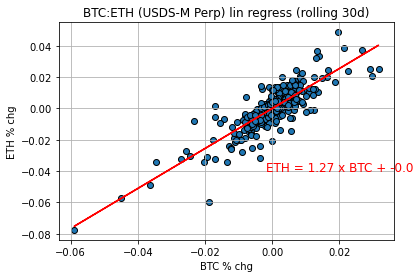

In [59]:
# Lin regress
x_value = BEXAS_df["pct_BTC"]
y_value = BEXAS_df["pct_ETH"]

x_label = "BTC"
y_label = "ETH"

linear_regression(x_value, y_value, x_label, y_label)

#### BTCUSDT vs. XRPUSDT Plot

The r-value is:0.5702397251652612
The beta is:0.8125655459865964


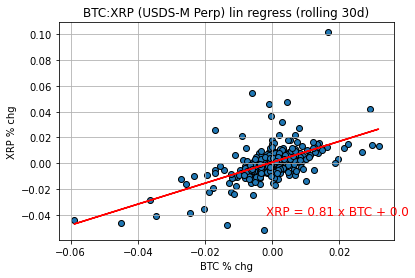

In [60]:
# Lin regress
x_value = BEXAS_df["pct_BTC"]
y_value = BEXAS_df["pct_XRP"]

x_label = "BTC"
y_label = "XRP"

linear_regression(x_value, y_value, x_label, y_label)

#### BTCUSDT vs. ADAUSDT Plot

The r-value is:0.7292276424367206
The beta is:0.9153754362636967


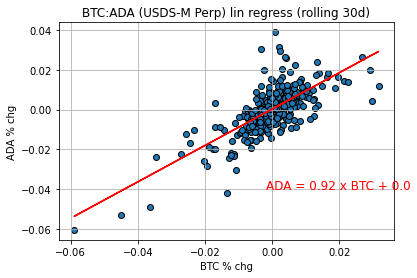

In [61]:
# Lin regress
x_value = BEXAS_df["pct_BTC"]
y_value = BEXAS_df["pct_ADA"]

x_label = "BTC"
y_label = "ADA"

linear_regression(x_value, y_value, x_label, y_label)

#### BTCUSDT vs. SOLUSDT Plot

The r-value is:0.8024589624027668
The beta is:1.203414437324559


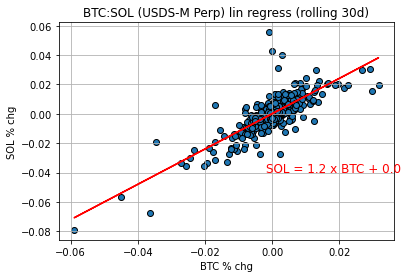

In [62]:
# Lin regress
x_value = BEXAS_df["pct_BTC"]
y_value = BEXAS_df["pct_SOL"]

x_label = "BTC"
y_label = "SOL"

linear_regression(x_value, y_value, x_label, y_label)

#### ETHUSDT vs. XRPUSDT Plot

The r-value is:0.5530497174763895
The beta is:0.5244847381010818


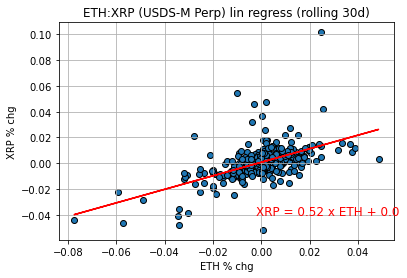

In [63]:
# Lin regress
x_value = BEXAS_df["pct_ETH"]
y_value = BEXAS_df["pct_XRP"]

x_label = "ETH"
y_label = "XRP"

linear_regression(x_value, y_value, x_label, y_label)

#### ETHUSDT vs. ADAUSDT Plot

The r-value is:0.77618099374364
The beta is:0.6484356456952282


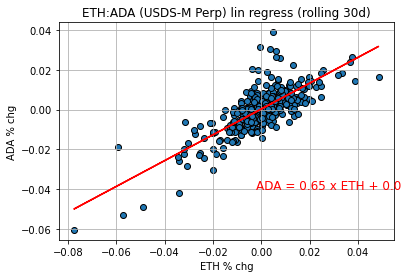

In [64]:
# Lin regress
x_value = BEXAS_df["pct_ETH"]
y_value = BEXAS_df["pct_ADA"]

x_label = "ETH"
y_label = "ADA"

linear_regression(x_value, y_value, x_label, y_label)

#### ETHUSDT vs. SOLUSDT Plot

The r-value is:0.8249375890178017
The beta is:0.8233438086921344


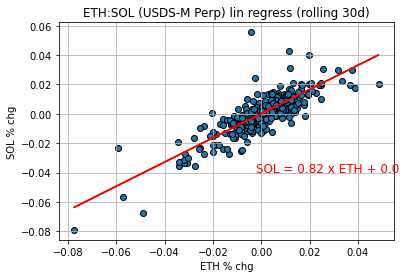

In [65]:
# Lin regress
x_value = BEXAS_df["pct_ETH"]
y_value = BEXAS_df["pct_SOL"]

x_label = "ETH"
y_label = "SOL"

linear_regression(x_value, y_value, x_label, y_label)

#### XRPUSDT vs. ADAUSDT Plot

The r-value is:0.5763828442608473
The beta is:0.5077456859525779


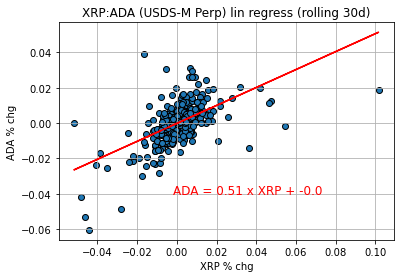

In [66]:
# Lin regress
x_value = BEXAS_df["pct_XRP"]
y_value = BEXAS_df["pct_ADA"]

x_label = "XRP"
y_label = "ADA"

linear_regression(x_value, y_value, x_label, y_label)

#### XRPUSDT vs. SOLUSDT Plot

The r-value is:0.5469102746153613
The beta is:0.5755824360873398


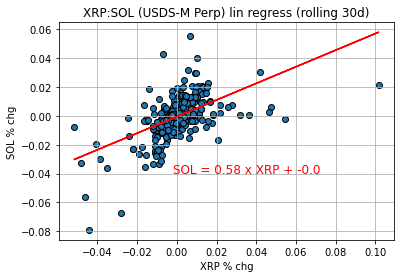

In [67]:
# Lin regress
x_value = BEXAS_df["pct_XRP"]
y_value = BEXAS_df["pct_SOL"]

x_label = "XRP"
y_label = "SOL"

linear_regression(x_value, y_value, x_label, y_label)

#### ADAUSDT vs. SOLUSDT Plot

The r-value is:0.7711874632628732
The beta is:0.9213321265058922


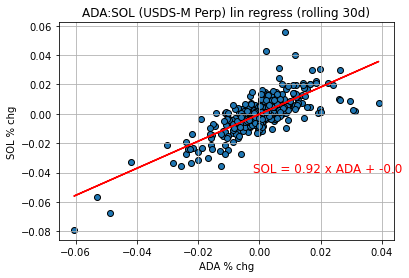

In [68]:
# Lin regress
x_value = BEXAS_df["pct_ADA"]
y_value = BEXAS_df["pct_SOL"]

x_label = "ADA"
y_label = "SOL"

linear_regression(x_value, y_value, x_label, y_label)

In [69]:
## Display correlations (descending order)

# Convert dict to df
correlations_df = pd.DataFrame(pairs_correlation).sort_values("r-value", ascending=False)
correlations_df["Earliest_interval"] = earliest
correlations_df["Latest_interval"] = latest
correlations_df["API_queried_UTC"] = executed_utc
print(f"Correlations of Binance USDS-M Perps (30d rolling)")
correlations_df

Correlations of Binance USDS-M Perps (30d rolling)


,Pair,r-value,beta,Earliest_interval,Latest_interval,API_queried_UTC
0,BTC:ETH,0.848514,1.274945,2022-08-22 10:00:00,2022-09-21 08:00:00,2022-09-21 09:40:40.432192+00:00
6,ETH:SOL,0.824938,0.823344,2022-08-22 10:00:00,2022-09-21 08:00:00,2022-09-21 09:40:40.432192+00:00
3,BTC:SOL,0.802459,1.203414,2022-08-22 10:00:00,2022-09-21 08:00:00,2022-09-21 09:40:40.432192+00:00
5,ETH:ADA,0.776181,0.648436,2022-08-22 10:00:00,2022-09-21 08:00:00,2022-09-21 09:40:40.432192+00:00
9,ADA:SOL,0.771187,0.921332,2022-08-22 10:00:00,2022-09-21 08:00:00,2022-09-21 09:40:40.432192+00:00
2,BTC:ADA,0.729228,0.915375,2022-08-22 10:00:00,2022-09-21 08:00:00,2022-09-21 09:40:40.432192+00:00
7,XRP:ADA,0.576383,0.507746,2022-08-22 10:00:00,2022-09-21 08:00:00,2022-09-21 09:40:40.432192+00:00
1,BTC:XRP,0.570240,0.812566,2022-08-22 10:00:00,2022-09-21 08:00:00,2022-09-21 09:40:40.432192+00:00
4,ETH:XRP,0.553050,0.524485,2022-08-22 10:00:00,2022-09-21 08:00:00,2022-09-21 09:40:40.432192+00:00
8,XRP:SOL,0.546910,0.575582,2022-08-22 10:00:00,2022-09-21 08:00:00,2022-09-21 09:40:40.432192+00:00


In [70]:
# ! pip install dataframe_image
import dataframe_image as dfi

correlations_styled_df = correlations_df.style.background_gradient()
dfi.export(correlations_styled_df, "Images/Correlations_descending.png")